In [1]:
import os
from collections import Counter #to count the number of classes/labels
import numpy as np #2d numpy arrays
import matplotlib.pyplot as plt
from keras.models import Sequential #To make sure that the layers go sequential in order
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense #importing all the layers needed
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img #we use these in image augmentation
from PIL import Image
from glob import glob
from google.colab import drive

In [2]:
#Mounting the drive
drive.mount('/content/gdrive')
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle" #kaggle folder
%cd /content/gdrive/My Drive/Kaggle
#Downloading dataset
!kaggle datasets download -d moltean/fruits

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/Kaggle. Or use the environment method.


In [3]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('./fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

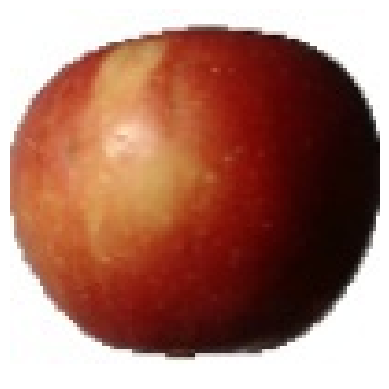

(100, 100, 3)


In [4]:
#Setting Training & Test dir paths
train_path = '/content/gdrive/MyDrive/Kaggle/Fruit-Images-Dataset-master/Training'
test_path = '/content/gdrive/MyDrive/Kaggle/Fruit-Images-Dataset-master/Test'
#Displaying the image
img = load_img(train_path + "/Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

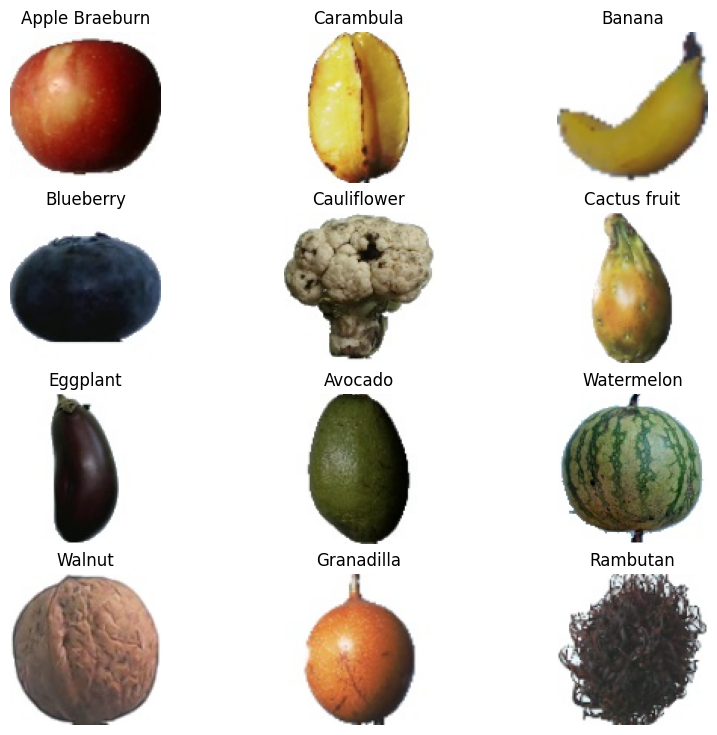

In [5]:
#Visualizing more Images
images = ['Apple Braeburn', 'Carambula', 'Banana', 'Blueberry', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon', 'Walnut', 'Granadilla', 'Rambutan']
fig = plt.figure(figsize =(10,9))
for i in range(len(images)):
    ax = fig.add_subplot(4,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + '/'+ images[i] +"/0_100.jpg", target_size=(100,100)))

In [6]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [7]:
#Printing all the categories available
l={}
for i,j in enumerate(className):
  a=j.rfind('/')
  print(j[a+1:])
  l[j[a+1:]]=i

Avocado
Apple Pink Lady
Apple Granny Smith
Apple Red 2
Apple Braeburn
Apple Red 1
Apple Golden 2
Apple Red 3
Apple Crimson Snow
Apple Golden 3
Apple Golden 1
Apple Red Delicious
Apple Red Yellow 1
Apple Red Yellow 2
Apricot
Avocado ripe
Banana
Banana Lady Finger
Banana Red
Beetroot
Blueberry
Cactus fruit
Cantaloupe 2
Cantaloupe 1
Carambula
Cauliflower
Cherry 1
Cherry 2
Cherry Rainier
Cherry Wax Black
Cherry Wax Red
Cherry Wax Yellow
Chestnut
Clementine
Cocos
Corn
Corn Husk
Cucumber Ripe
Cucumber Ripe 2
Dates
Eggplant
Fig
Ginger Root
Granadilla
Grape Blue
Grape Pink
Grape White
Grape White 2
Grape White 3
Grape White 4
Grapefruit Pink
Grapefruit White
Guava
Hazelnut
Huckleberry
Kaki
Kiwi
Kohlrabi
Kumquats
Lemon
Lemon Meyer
Limes
Mandarine
Lychee
Mango
Mango Red
Mangostan
Melon Piel de Sapo
Maracuja
Mulberry
Nectarine
Nectarine Flat
Nut Forest
Nut Pecan
Onion Red
Onion Red Peeled
Onion White
Orange
Papaya
Passion Fruit
Peach
Peach 2
Peach Flat
Pear
Pear 2
Pear Abate
Pear Forelle
Pear Kai

In [8]:
#Network architecture
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape)) #Filter size=32, filter_shape = 3x3
model.add(Activation("relu")) #relu activation function
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu")) #relu activation function
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3))) #number of filters= 64
model.add(Activation("relu")) #relu activation function
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation("relu")) #relu activation function
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) #output layer with number_of_class units
model.add(Activation("softmax")) #softmax activation function

#Compiling the model
model.compile(loss = "categorical_crossentropy", #cross-entropy loss function
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                   

In [9]:
epochs = 9 #number of iterations
batch_size = 64 #number of samples that are picked at a time

In [10]:
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 63764 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [16]:
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

<ipython-input-16-4aaecb1e5e87>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/9
25/25 [==============================] - 461s 19s/step - loss: 1.7065 - accuracy: 0.4731 - val_loss: 1.1575 - val_accuracy: 0.6589
Epoch 2/9
25/25 [==============================] - 443s 18s/step - loss: 1.5264 - accuracy: 0.5331 - val_loss: 1.1789 - val_accuracy: 0.6458
Epoch 3/9
25/25 [==============================] - 432s 17s/step - loss: 1.3509 - accuracy: 0.5800 - val_loss: 1.0372 - val_accuracy: 0.7161
Epoch 4/9
25/25 [==============================] - 425s 17s/step - loss: 1.3034 - accuracy: 0.6009 - val_loss: 0.8145 - val_accuracy: 0.7734
Epoch 5/9
25/25 [==============================] - 423s 17s/step - loss: 1.0981 - accuracy: 0.6444 - val_loss: 0.8980 - val_accuracy: 0.7188
Epoch 6/9
25/25 [==============================] - 424s 17s/step - loss: 1.0996 - accuracy: 0.6494 - val_loss: 0.8530 - val_accuracy: 0.7461
Epoch 7/9
25/25 [==============================] - 414s 17s/step - loss: 1.0318 - accuracy: 0.6744 - val_loss: 1.2608 - val_accuracy: 0.6107
Epoch 8/9
25/

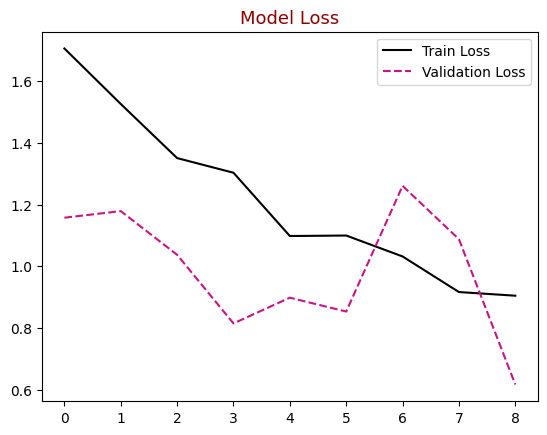

In [17]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

In [18]:
print(l)

{'Avocado': 0, 'Apple Pink Lady': 1, 'Apple Granny Smith': 2, 'Apple Red 2': 3, 'Apple Braeburn': 4, 'Apple Red 1': 5, 'Apple Golden 2': 6, 'Apple Red 3': 7, 'Apple Crimson Snow': 8, 'Apple Golden 3': 9, 'Apple Golden 1': 10, 'Apple Red Delicious': 11, 'Apple Red Yellow 1': 12, 'Apple Red Yellow 2': 13, 'Apricot': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 2': 22, 'Cantaloupe 1': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

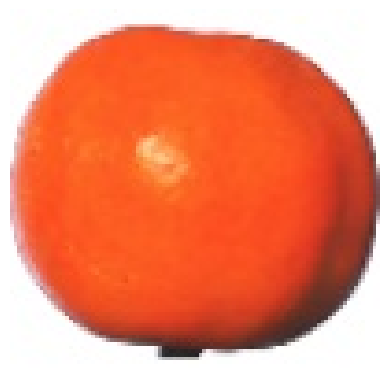

In [19]:
#testing 1
img = load_img(test_path + "/Clementine/32_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load(test_path + "/Clementine/32_100.jpg")

In [20]:
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)
print(list(l.keys())[list(l.values()).index(prediction)])

1/1 [==============================] - 0s 25ms/step
[33]
Clementine


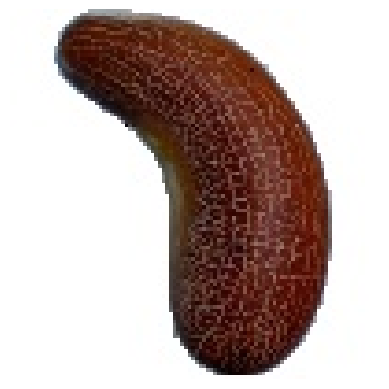

In [21]:
#testing 2
img = load_img(test_path + "/Cucumber Ripe/55_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load(test_path + "/Cucumber Ripe/55_100.jpg")

In [22]:
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)
print(list(l.keys())[list(l.values()).index(prediction)])

1/1 [==============================] - 0s 37ms/step
[37]
Cucumber Ripe


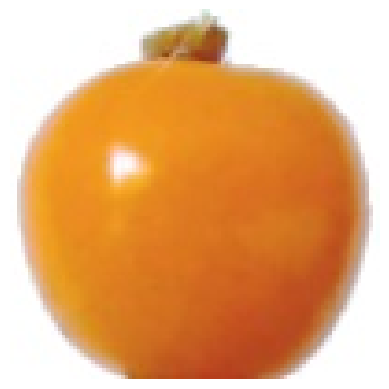

In [23]:
#testing 3
img = load_img(test_path + "/Physalis/21_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load(test_path + "/Physalis/21_100.jpg")

In [24]:
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)
print(list(l.keys())[list(l.values()).index(prediction)])

1/1 [==============================] - 0s 25ms/step
[97]
Physalis
